**Model to calculate depth in an Earthquare**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [86]:
df=pd.read_csv('database.csv')
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [87]:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


**Cleaning Data**

In [88]:
# identifying columns with NaN or Null values
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [89]:
# Dropping columns no useful for our project given that mostly are NaN values
columns_to_drop=['Magnitude Type','Magnitude Error','Depth Error','Depth Seismic Stations','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square']
df=df.drop(columns=columns_to_drop)

In [90]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [91]:
df.count()

Date                23412
Time                23412
Latitude            23412
Longitude           23412
Type                23412
Depth               23412
Magnitude           23412
ID                  23412
Source              23412
Location Source     23412
Magnitude Source    23412
Status              23412
dtype: int64

In [92]:
# Filtering data only with Earthquake events
NType=df['Type']=='Earthquake'
NType.head(5)

0    True
1    True
2    True
3    True
4    True
Name: Type, dtype: bool

In [93]:
df=df[NType]
df.count()

Date                23232
Time                23232
Latitude            23232
Longitude           23232
Type                23232
Depth               23232
Magnitude           23232
ID                  23232
Source              23232
Location Source     23232
Magnitude Source    23232
Status              23232
dtype: int64

In [94]:
# Creating a new dataframe with the most important columns for our project
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


**Exploring data**

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

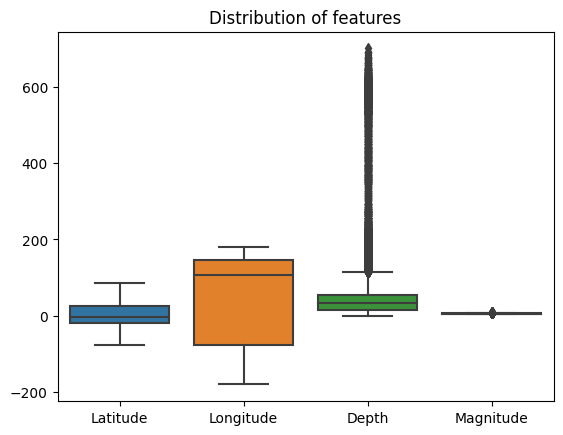

In [96]:
sns.boxplot(df)
plt.title("Distribution of features")
plt.show()

C:\Users\Javier Melo\AppData\Local\Temp\ipykernel_23620\1619417070.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


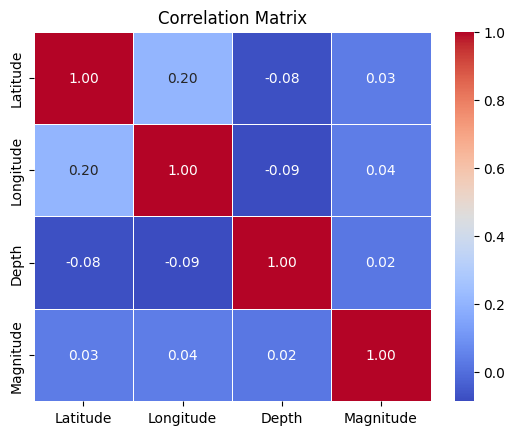

In [97]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [98]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

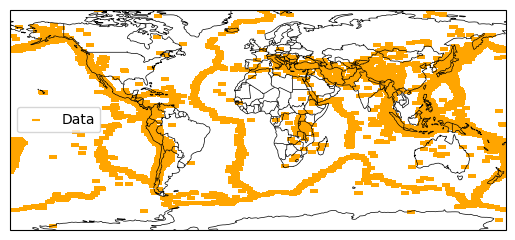

In [99]:
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': projection})

ax.set_extent([-180, 180, -80, 80], crs=projection)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

longitudes = np.array(longitudes)
latitudes = np.array(latitudes)

xy = projection.transform_points(ccrs.Geodetic(), longitudes, latitudes)
x, y = xy[:, 0], xy[:, 1]

ax.scatter(x, y, marker='_', color='orange', label='Data')
plt.legend()
plt.show()

**Preprocessing**

In [100]:
import datetime
import time

In [101]:
#Transforming Date feature in a valid format
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y', errors='coerce')

df.head(5)

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,1965-01-02,13:44:18,19.246,145.616,131.6,6.0
1,1965-01-04,11:29:49,1.863,127.352,80.0,5.8
2,1965-01-05,18:05:58,-20.579,-173.972,20.0,6.2
3,1965-01-08,18:49:43,-59.076,-23.557,15.0,5.8
4,1965-01-09,13:32:50,11.938,126.427,15.0,5.8


In [102]:
df['Date'].describe

<bound method NDFrame.describe of 0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: Date, Length: 23232, dtype: datetime64[ns]>

In [103]:
df['Time'].describe

<bound method NDFrame.describe of 0        13:44:18
1        11:29:49
2        18:05:58
3        18:49:43
4        13:32:50
           ...   
23407    08:22:12
23408    09:13:47
23409    12:38:51
23410    22:30:19
23411    20:08:28
Name: Time, Length: 23232, dtype: object>

In [104]:
# Identyfing no valid format for time
count_format1 = df['Time'].str.contains('\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z').sum()
print(count_format1)


3


In [105]:
count_format2 = df['Time'].str.contains('\d{2}:\d{2}:\d{2}').sum()
print(count_format2)

23232


In [106]:
# Building a new df without no valid formats for Time
df = df[~df['Time'].str.contains('\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z')]

In [107]:
count_format2 = df['Time'].str.contains('\d{2}:\d{2}:\d{2}').sum()
print(count_format2)

23229


In [108]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [109]:
df['Time'].describe()

C:\Users\Javier Melo\AppData\Local\Temp\ipykernel_23620\1939151946.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Time'].describe()


count                   23229
unique                  20348
top       1900-01-01 14:09:03
freq                        5
first     1900-01-01 00:00:03
last      1900-01-01 23:59:58
Name: Time, dtype: object

In [110]:
df['Date-Hour'] = df.apply(lambda row: row['Date'] + pd.DateOffset(hours=row['Time'].hour, minutes=row['Time'].minute, seconds=row['Time'].second), axis=1)

In [111]:
df['Date-Hour'].describe()

C:\Users\Javier Melo\AppData\Local\Temp\ipykernel_23620\1626576309.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Date-Hour'].describe()


count                   23229
unique                  23210
top       1994-02-16 06:48:58
freq                        2
first     1965-01-02 13:44:18
last      2016-12-30 20:08:28
Name: Date-Hour, dtype: object

In [112]:
df=df[['Date-Hour','Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head(10)

,Date-Hour,Latitude,Longitude,Depth,Magnitude
0,1965-01-02 13:44:18,19.246,145.616,131.6,6.0
1,1965-01-04 11:29:49,1.863,127.352,80.0,5.8
2,1965-01-05 18:05:58,-20.579,-173.972,20.0,6.2
3,1965-01-08 18:49:43,-59.076,-23.557,15.0,5.8
4,1965-01-09 13:32:50,11.938,126.427,15.0,5.8
5,1965-01-10 13:36:32,-13.405,166.629,35.0,6.7
6,1965-01-12 13:32:25,27.357,87.867,20.0,5.9
7,1965-01-15 23:17:42,-13.309,166.212,35.0,6.0
8,1965-01-16 11:32:37,-56.452,-27.043,95.0,6.0
9,1965-01-17 10:43:17,-24.563,178.487,565.0,5.8


**Feature Engineering**

In [113]:
# Splitting Date column among 5 new features (Year, Month, Day, Hours, Minutes)
df['Year'] = df['Date-Hour'].dt.year
df['Month'] = df['Date-Hour'].dt.month
df['Day'] = df['Date-Hour'].dt.day
df['Hour'] = df['Date-Hour'].dt.hour
df['Minutes'] = df['Date-Hour'].dt.minute
df.head(5)

,Date-Hour,Latitude,Longitude,Depth,Magnitude,Year,Month,Day,Hour,Minutes
0,1965-01-02 13:44:18,19.246,145.616,131.6,6.0,1965,1,2,13,44
1,1965-01-04 11:29:49,1.863,127.352,80.0,5.8,1965,1,4,11,29
2,1965-01-05 18:05:58,-20.579,-173.972,20.0,6.2,1965,1,5,18,5
3,1965-01-08 18:49:43,-59.076,-23.557,15.0,5.8,1965,1,8,18,49
4,1965-01-09 13:32:50,11.938,126.427,15.0,5.8,1965,1,9,13,32


**Model Selection**

In [114]:
# Splitting data to predict Depth
X = df[['Year', 'Month', 'Day', 'Hour', 'Minutes','Latitude', 'Longitude', 'Magnitude']]
y = df[['Depth']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18583, 8) (4646, 8) (18583, 1) (4646, 8)


Random Forest Regressor

In [115]:
#Random Forest Regressor to predict Depth
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

C:\Users\Javier Melo\AppData\Local\Temp\ipykernel_23620\1881110379.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [116]:
y_pred= model.predict(X_test) 

In [117]:
# R2 in 84% which means is a model acceptably fitted
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (Depth): {mse}')
print(f'R2_Score: {r2}')

Mean Squared Error (Depth): 2411.9207143906106
R2_Score: 0.8389918312823044


**Hyperparameter Tuning**

In [118]:
# Using GridSearchCV to improve the model

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(model, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

c:\Users\Javier Melo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Javier Melo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Javier Melo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Javier Melo\A

array([ 9.709608, 24.192374, 95.6996  , ..., 53.63014 , 18.16824 ,
       17.35468 ])

In [119]:
# Doing a new prediction
newy_pred=best_fit.predict(X_test)

In [120]:
# Evaluating again the model, practically same R2 84%
mse = mean_squared_error(y_test, newy_pred)
r2 = r2_score(y_test, newy_pred)
print(f'Mean Squared Error (Depth): {mse}')
print(f'R2_Score: {r2}')

Mean Squared Error (Depth): 2417.917795232382
R2_Score: 0.8385914951525865


Second model Multiple Linear Regression

In [121]:
# Fitting the model for Magnitude
model_LG = LinearRegression()
model_LG.fit(X_train, y_train)

LinearRegression()

In [122]:
y_predictions = model_LG.predict(X_test)

In [123]:
# R2 too low in this model
mse = mean_squared_error(y_test, y_predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_predictions)
print(f'R2_Score: {r2}')

Mean Squared Error: 14688.786179551362
R2_Score: 0.019447633852716084


Third Model Decission Tree

In [124]:
from sklearn.tree import DecisionTreeRegressor

modeldt = DecisionTreeRegressor(random_state=42)
modeldt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [125]:
y_dtpredictions = modeldt.predict(X_test)

In [126]:
mse_magnitude = mean_squared_error(y_test, y_dtpredictions)
print(f'Mean Squared Error (Magnitude): {mse_magnitude}')
r2 = r2_score(y_test, y_dtpredictions)
print(f'R2_Score: {r2}')

Mean Squared Error (Magnitude): 4875.011213982996
R2_Score: 0.67456781503701


In [127]:
newdf=X_test
newdf['Depth']=y_test
newdf['Depth Prediction']=y_pred
newdf.head(5)

,Year,Month,Day,Hour,Minutes,Latitude,Longitude,Magnitude,Depth,Depth Prediction
10979,1992,6,28,12,1,34.1200,-116.3230,5.7,5.706,10.22242
22902,2015,11,23,20,41,16.9762,-98.9116,5.6,34.000,22.95607
14500,1999,9,10,8,45,46.0240,150.2600,5.8,91.200,94.12500
2609,1973,2,14,0,49,22.2880,121.5500,5.9,38.000,35.03700
14793,2000,4,16,13,25,-18.7020,-173.6860,5.6,65.400,38.54070


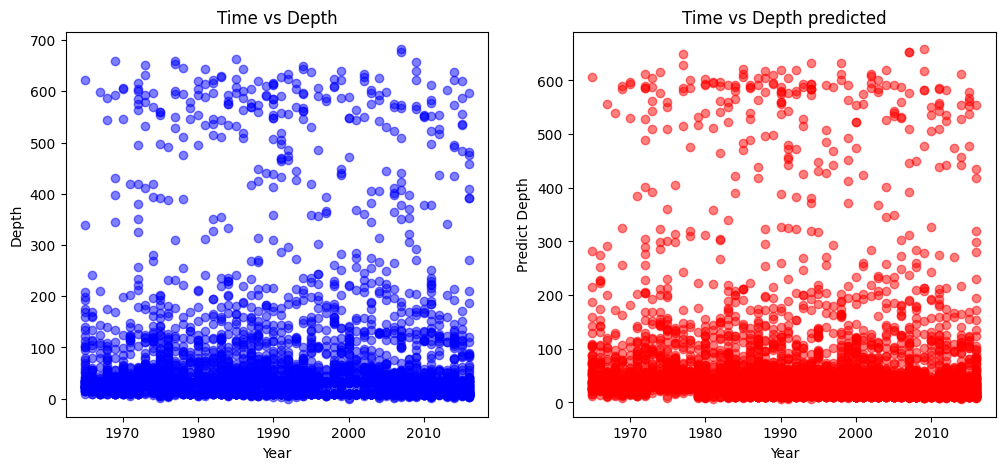

In [128]:
# Graphing values obtained with the model Random Forest Regressor

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graphing real values
ax1.scatter(newdf['Year'], newdf['Depth'], alpha=0.5, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Depth')
ax1.set_title('Time vs Depth')

# Graphing predict values
ax2.scatter(newdf['Year'], newdf['Depth Prediction'], alpha=0.5, color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Predict Depth')
ax2.set_title('Time vs Depth predicted')

#plt.tight_layout()
plt.show()

In [129]:
# Saving the Random Forest Regressor wich generated a better performance
joblib.dump(model, 'depth.h5')


['depth.h5']

**Model 2 ANN**

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [131]:
# Splitting data
X = df[['Year', 'Month', 'Day', 'Hour', 'Minutes','Latitude', 'Longitude', 'Magnitude']]
y = df[['Depth']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18583, 8) (4646, 8) (18583, 1) (4646, 8)


In [132]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
# Defining the ANN model
depth_model = MLPRegressor(hidden_layer_sizes=(400, 150), max_iter=600, random_state=42)

In [134]:
depth_model.fit(X_train_scaled, y_train)

c:\Users\Javier Melo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(400, 150), max_iter=600, random_state=42)

In [135]:
y_pred = depth_model.predict(X_test_scaled)

In [136]:
# R2 a little more than 50% this was the most high level achieved with this model
mse_depth = mean_squared_error(y_test, y_pred)
r2_depth = r2_score(y_test, y_pred)
print("Depth Model:")
print(f"Mean Squared Error: {mse_depth}")
print(f"R-squared: {r2_depth}")

Depth Model:
Mean Squared Error: 7366.3410881296495
R-squared: 0.508258674643319


In [137]:
newdf2=X_test
newdf2['Depth']=y_test
newdf2['Depth Prediction']=y_pred
newdf2.head(5)

,Year,Month,Day,Hour,Minutes,Latitude,Longitude,Magnitude,Depth,Depth Prediction
10979,1992,6,28,12,1,34.1200,-116.3230,5.7,5.706,22.710326
22902,2015,11,23,20,41,16.9762,-98.9116,5.6,34.000,50.566378
14500,1999,9,10,8,45,46.0240,150.2600,5.8,91.200,63.183847
2609,1973,2,14,0,49,22.2880,121.5500,5.9,38.000,12.872738
14793,2000,4,16,13,25,-18.7020,-173.6860,5.6,65.400,85.991766


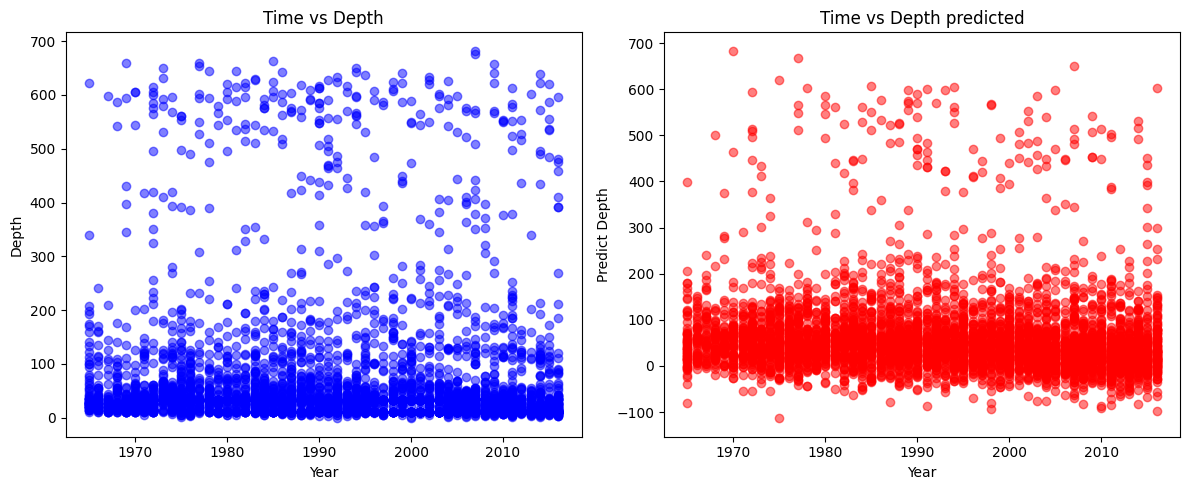

In [138]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

# Graphing real values
ax3.scatter(newdf2['Year'], newdf2['Depth'], alpha=0.5, color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('Depth')
ax3.set_title('Time vs Depth')

# Graphing predict values
ax4.scatter(newdf2['Year'], newdf2['Depth Prediction'], alpha=0.5, color='red')
ax4.set_xlabel('Year')
ax4.set_ylabel('Predict Depth')
ax4.set_title('Time vs Depth predicted')

plt.tight_layout()
plt.show()

In [139]:
joblib.dump(depth_model, 'depth_ANN.h5')

['depth_ANN.h5']